0      0.034291
1      0.029007
2      0.029715
3      0.029587
4      0.034872
         ...   
195    0.028239
196    0.031915
197    0.029989
198    0.028996
199    0.031010
Name: qs1, Length: 200, dtype: float64
anova p-value of 0.0 means that there is a difference amongst
the means of the algorithms and we can conduct a post-hoc analysis

            variable     value
0                qs1  0.034291
1                qs1  0.029007
2                qs1  0.029715
3                qs1  0.029587
4                qs1  0.034872
...              ...       ...
1395  partition_sort  0.023901
1396  partition_sort  0.019989
1397  partition_sort  0.020652
1398  partition_sort  0.023941
1399  partition_sort  0.020964

[1400 rows x 2 columns]
        Multiple Comparison of Means - Tukey HSD, FWER=0.50         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
        merge1 partition_sort  -0.0311  0.001 -0.03

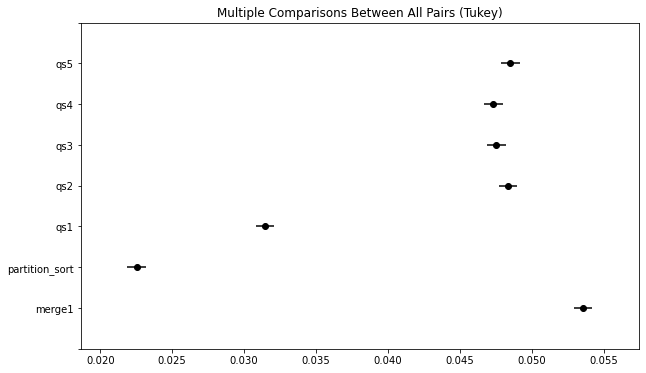

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import sys

df = pd.read_csv('data.csv')

anova = stats.f_oneway(df.qs1, df.qs2, df.qs3, df.qs4, df.qs5, df.merge1, df.partition_sort)
melt = pd.melt(df)
print("anova p-value of", anova.pvalue, "means that there is a difference amongst")
print("the means of the algorithms and we can conduct a post-hoc analysis")
print()
posthoc = pairwise_tukeyhsd(melt['value'], melt['variable'], alpha=0.5)
print(posthoc)
fig = posthoc.plot_simultaneous()
print('qs1 mean running time:', df.qs1.mean())
print('qs2 mean running time:', df.qs2.mean())
print('qs3 mean running time:', df.qs3.mean())
print('qs4 mean running time:', df.qs4.mean())
print('qs5 mean running time:', df.qs5.mean())
print('merge1 mean running time:', df.merge1.mean())
print('partition_sort mean running time:', df.partition_sort.mean())
print()
print('All pairs have distinguishable different mean running times except pairs') 
print('(qs2, qs3), (qs2, qs4), (qs2, qs5), (qs3, qs4), and (qs3, qs5)')
print('fastest algorithms in descending order are:')
print('partition_sort, qs1, qs4, qs3, qs2, qs5, merge1')